# 3. Read from (SELECT) Database Table with SQLite

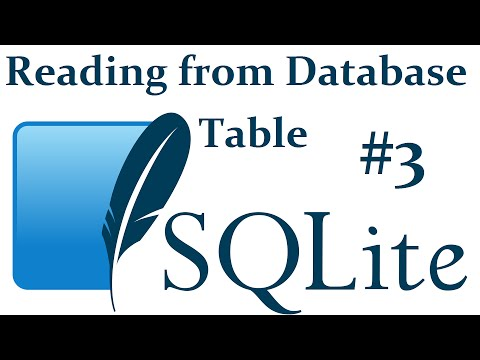

In [52]:
from IPython.display import YouTubeVideo
YouTubeVideo('NCc5r7Wr7gg')

## 3.1 Existing code

In [53]:
import sqlite3
import time
import datetime
import random

# Connect to the database called 'tutorial.db'. If it does't exist, it will be created.
# If it does exist, it will NOT be overwritten or re-created.
conn = sqlite3.connect('tutorial.db')

# Get the cursor which can select/delete/add things and so on.
c = conn.cursor()

def create_table():
    # Create a table called stuffToPlot if it doesn't exist. This table contains the following columns: 
    # unix, datestamp, keyword, value.
    c.execute("CREATE TABLE IF NOT EXISTS stuffToPlot(unix REAL, datestamp TEXT, keyword TEXT, value REAL)")
    
def insert_data_entry():
    # The cursor executes an SQL query "INSERT INTO" to insert a tuple of values into the table 'stuffToPlot'.
    c.execute("INSERT INTO stuffToPlot VALUES(1452549219, '2016-01-11 13:53:39', 'Python', 6)")
    
    # Commit the SQL query "INSERT INTO" and save the change in the table. 
    conn.commit()
    
    # Comment out the closure code to improve the efficiency.
    # c.close()
    # conn.close()
    
def insert_dynamic_data_entry():
    unix = int(time.time())
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    keyword = "Python"
    value = random.randrange(0, 10)
    
    # While SQLite uses "?" as the placeholder of the input variable, MySQL uses "%s".
    c.execute("INSERT INTO stuffToPlot (unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",
             (unix, date, keyword, value))
    
    conn.commit()

## 3.2 Read all rows.

The operation "SELECT" is like you highlight the data region you want in the table with a mouse cursor. Then fetchall() will give you the actual data.

In [54]:
def read_all_from_db():
    # Select all the rows.
    c.execute("SELECT * from stuffToPlot")
    # Fetch all the selected rows.
    data = c.fetchall()
    
    for row in data:
        print(row)
    
    
# create_table()
# insert_date_entry()

# for i in range(10):
#     insert_dynamic_data_entry()
#     time.sleep(1) # Sleep for 1 second.

read_all_from_db()
    


(1517301598.0, '2018-01-30 00:39:58', 'Python', 3.0)
(1517301599.0, '2018-01-30 00:39:59', 'Python', 5.0)
(1517301600.0, '2018-01-30 00:40:00', 'Python', 0.0)
(1517301601.0, '2018-01-30 00:40:01', 'Python', 1.0)
(1517301602.0, '2018-01-30 00:40:02', 'Python', 3.0)
(1517301603.0, '2018-01-30 00:40:03', 'Python', 6.0)
(1517301604.0, '2018-01-30 00:40:04', 'Python', 4.0)
(1517301605.0, '2018-01-30 00:40:05', 'Python', 8.0)
(1517301606.0, '2018-01-30 00:40:06', 'Python', 1.0)
(1517301607.0, '2018-01-30 00:40:07', 'Python', 7.0)


## 3.3 Read specific rows.

In [55]:
def read_some_from_db():
    # Select the rows which satisfy the conditions.
    #c.execute("SELECT * from stuffToPlot WHERE value=3")
    #c.execute("SELECT * from stuffToPlot WHERE value=3 AND keyword='Python'")
    #c.execute("SELECT * from stuffToPlot WHERE unix>=1517301604")
    # Select some columns in the rows.
    c.execute("SELECT keyword, unix from stuffToPlot WHERE unix>=1517301604")
    
    # Fetch the selected rows.
    data = c.fetchall()
    
    for row in data:
        # Print the first element in the row. Note that the order of the elements 
        # in a row can be specified in the SELECT command, and thus may be different 
        # from the order of the columns in the table.
        #print(row[0])
        print(row)
        
read_some_from_db()

('Python', 1517301604.0)
('Python', 1517301605.0)
('Python', 1517301606.0)
('Python', 1517301607.0)


In [56]:
c.close()
conn.close()